## [진행상황]

## 1. 연도별 데이터 concat

## 2. y변수추가

## 3. Feature Selecting

## 4. null값 확인(홍익선님 코드 참고)

## 5. 변수들 간의 correlation 확인

### 기존데이터 불러오기(이건 무시..)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# 경기 데이터
game_2016 = pd.read_csv('data\game_2016.csv', encoding='CP949')
game_2017 = pd.read_csv('data\game_2017.csv', encoding='CP949')
game_2018 = pd.read_csv('data\game_2018.csv', encoding='CP949')
game_2019 = pd.read_csv('data\game_2019.csv', encoding='CP949')
game_2020 = pd.read_csv('data\game_2020.csv', encoding='CP949')

In [3]:
# 선수 데이터 
players_2016 = pd.read_csv('data\players_2016.csv', encoding='CP949')
players_2017 = pd.read_csv('data\players_2017.csv', encoding='CP949')
players_2018 = pd.read_csv('data\players_2018.csv', encoding='CP949')
players_2019 = pd.read_csv('data\players_2019.csv', encoding='CP949')
players_2020 = pd.read_csv('data\players_2020.csv', encoding='CP949')

In [4]:
# 개인 투수 
private_pitcher_2016 = pd.read_csv('data\private_pitcher_2016.csv',encoding='CP949')
private_pitcher_2017 = pd.read_csv('data\private_pitcher_2017.csv',encoding='CP949')
private_pitcher_2018 = pd.read_csv('data\private_pitcher_2018.csv',encoding='CP949')
private_pitcher_2019 = pd.read_csv('data\private_pitcher_2019.csv',encoding='CP949')
private_pitcher_2020 = pd.read_csv('data\private_pitcher_2020.csv',encoding='CP949')

In [5]:
# 개인 타자 
private_batter_2016 = pd.read_csv('data\private_batter_2016.csv', encoding='CP949')
private_batter_2017 = pd.read_csv('data\private_batter_2017.csv', encoding='CP949')
private_batter_2018 = pd.read_csv('data\private_batter_2018.csv', encoding='CP949')
private_batter_2019 = pd.read_csv('data\private_batter_2019.csv', encoding='CP949')
private_batter_2020 = pd.read_csv('data\private_batter_2020.csv', encoding='CP949')

In [6]:
# 팀 투수
team_pitcher_2016 = pd.read_csv('data\\team_pitcher_2016.csv',encoding='CP949')
team_pitcher_2017 = pd.read_csv('data\\team_pitcher_2017.csv',encoding='CP949')
team_pitcher_2018 = pd.read_csv('data\\team_pitcher_2018.csv',encoding='CP949')
team_pitcher_2019 = pd.read_csv('data\\team_pitcher_2019.csv',encoding='CP949')
team_pitcher_2020 = pd.read_csv('data\\team_pitcher_2020.csv',encoding='CP949')

In [7]:
# 팀 타자 
team_batter_2016 = pd.read_csv('data\\team_batter_2016.csv', encoding='CP949')
team_batter_2017 = pd.read_csv('data\\team_batter_2017.csv', encoding='CP949')
team_batter_2018 = pd.read_csv('data\\team_batter_2018.csv', encoding='CP949')
team_batter_2019 = pd.read_csv('data\\team_batter_2019.csv', encoding='CP949')
team_batter_2020 = pd.read_csv('data\\team_batter_2020.csv', encoding='CP949')

In [8]:
# 팀
team = pd.read_csv('data\\team_2016.csv', encoding='CP949')

# 1. 연도별 데이터 하나의 데이터로 합치기 
- 등록선수 데이터 버리기
- 팀데이터는 연도별로 동일

In [9]:
game = pd.concat([game_2016,game_2017,game_2018,game_2019,game_2020])
players = pd.concat([players_2016,players_2017,players_2018,players_2019,players_2020])
private_pitcher = pd.concat([private_pitcher_2016,private_pitcher_2017,private_pitcher_2018,private_pitcher_2019,private_pitcher_2020])
private_batter = pd.concat([private_batter_2016,private_batter_2017,private_batter_2018,private_batter_2019,private_batter_2020])
team_pitcher = pd.concat([team_pitcher_2016,team_pitcher_2017,team_pitcher_2018,team_pitcher_2019,team_pitcher_2020])
team_batter = pd.concat([team_batter_2016,team_batter_2017,team_batter_2018,team_batter_2019,team_batter_2020])

In [10]:
game.to_csv('data\game.csv',index=False)
players.to_csv('data\players.csv',index=False)
private_pitcher.to_csv('data\private_pitcher.csv',index=False)
private_batter.to_csv('data\private_batter.csv',index=False)
team_pitcher.to_csv('data\\team_pitcher.csv',index=False)
team_batter.to_csv('data\\team_batter.csv',index=False)
team.to_csv('data\\team.csv',index=False)

# 2. 새로운 변수 추가 : 타율 출루율 방어율 도루관련변수

- 분모가 0이 나온 na값은 0으로 채워줌

### 1) 타율(AVG):  HIT / AB
- 안타(홈런)/타수

In [11]:
private_batter['AVG'] = private_batter['HIT']/private_batter['AB']
private_batter['AVG'] = private_batter['AVG'].fillna(0)

In [12]:
team_batter['AVG'] = team_batter['HIT']/team_batter['AB']
team_batter['AVG'] = team_batter['AVG'].fillna(0)

### 2) 출루율(OBP) : HIT +  BB + IB + HP / PA
- 안타(홈런),4구,고의4구,사구 / 타석수

In [13]:
private_batter['OBP'] = (private_batter['HIT']+private_batter['BB']+private_batter['IB']+private_batter['HP'])/private_batter['PA']
private_batter['OBP'] = private_batter['OBP'].fillna(0)

In [14]:
team_batter['OBP'] = (team_batter['HIT']+team_batter['BB']+team_batter['IB']+team_batter['HP'])/team_batter['PA']
team_batter['OBP'] = team_batter['OBP'].replace
team_batter['OBP'] = team_batter['OBP'].fillna(0)

### 3) 방어율(ERA): ER*9 / (INN2/3)

- (총 자책점 * 9 ) / 총 던진 이닝수 

In [15]:
private_pitcher['ERA'] = private_pitcher['ER'] / (private_pitcher['INN2']/3)
private_pitcher['ERA'] = private_pitcher['ERA'].fillna(0)

In [16]:
team_pitcher['ERA'] = team_pitcher['ER'] / (team_pitcher['INN2']/3)
team_pitcher['ERA'] = team_pitcher['ERA'].fillna(0)

### 4) 도루 시도 횟수(SB_trial):SB+CS

In [17]:
private_batter['SB_trial'] =  private_batter['SB'] + private_batter['CS']

In [18]:
team_batter['SB_trial'] =  team_batter['SB'] + team_batter['CS']

### 5) 도루 성공율(SB_SR) : SB / (SB+CS)

In [19]:
private_pitcher['SB_SR'] = private_pitcher['SB']/(private_pitcher['SB'] + private_pitcher['CS'])
private_pitcher['SB_SR'] = private_pitcher['SB_SR'].fillna(0)

In [20]:
team_pitcher['SB_SR'] = team_pitcher['SB']/(team_pitcher['SB'] + team_pitcher['CS'])
team_pitcher['SB_SR'] = team_pitcher['SB_SR'].fillna(0)

### 6) PA-AB

In [21]:
private_pitcher['PA-AB'] = private_pitcher['PA']-private_pitcher['AB']
private_batter['PA-AB'] = private_batter['PA']-private_batter['AB']

In [22]:
team_pitcher['PA-AB'] = team_pitcher['PA']-team_pitcher['AB']
team_batter['PA-AB'] = team_batter['PA']-team_batter['AB']

### 7) SH+SF

In [23]:
private_batter['SH+SF'] = private_batter['SH']+private_batter['SF']

In [24]:
team_batter['SH+SF'] = team_batter['SH']+team_batter['SF']

In [25]:
private_pitcher = private_pitcher.replace(np.inf,0)
private_batter = private_batter.replace(np.inf,0)
team_pitcher = team_pitcher.replace(np.inf,0)
team_batter = team_batter.replace(np.inf,0)

# 3. Feature Selecting 
- 개인 데이터, 팀 데이터 고려해서 각각 모델링을 하고 성능이 더 좋은 것을 사용하기로 함

### game

In [26]:
game.head(1)

,G_ID,GDAY_DS,VISIT_KEY,HOME_KEY,HEADER_NO,GWEEK,STADIUM
0,20160401HHLG0,20160401,HH,LG,0,금,잠실


In [27]:
game = game.drop(['G_ID','HEADER_NO','GWEEK'],axis=1)
game.head()

,GDAY_DS,VISIT_KEY,HOME_KEY,STADIUM
0,20160401,HH,LG,잠실
1,20160401,HT,NC,마산
2,20160401,KT,SK,문학
3,20160401,LT,WO,고척
4,20160401,OB,SS,대구


### players

In [28]:
players.head(1)

,GYEAR,PCODE,NAME,T_ID,POSITION,AGE_VA,MONEY
0,2016,60100,백창수,LG,내,28,4000만원


In [29]:
players = players.drop(['NAME','POSITION','MONEY'],axis=1)
players.head()

,GYEAR,PCODE,T_ID,AGE_VA
0,2016,60100,LG,28
1,2016,60105,LG,25
2,2016,60146,LG,25
3,2016,60164,LG,25
4,2016,60181,LG,28


### 개인 투수

In [30]:
private_pitcher.columns

Index(['G_ID', 'GDAY_DS', 'T_ID', 'VS_T_ID', 'HEADER_NO', 'TB_SC', 'P_ID',
       'START_CK', 'RELIEF_CK', 'CG_CK', 'QUIT_CK', 'WLS', 'HOLD', 'INN2',
       'BF', 'PA', 'AB', 'HIT', 'H2', 'H3', 'HR', 'SB', 'CS', 'SH', 'SF', 'BB',
       'IB', 'HP', 'KK', 'GD', 'WP', 'BK', 'ERR', 'R', 'ER', 'P_WHIP_RT',
       'P2_WHIP_RT', 'CB_WHIP_RT', 'ERA', 'SB_SR', 'PA-AB'],
      dtype='object')

In [31]:
private_pitcher = private_pitcher[['TB_SC','INN2','BF','PA-AB','AB','HIT','H2','H3','HR','SB_SR','KK','WP','ER','ERA']]

In [32]:
private_pitcher.columns

Index(['TB_SC', 'INN2', 'BF', 'PA-AB', 'AB', 'HIT', 'H2', 'H3', 'HR', 'SB_SR',
       'KK', 'WP', 'ER', 'ERA'],
      dtype='object')

In [33]:
private_pitcher.head()

,TB_SC,INN2,BF,PA-AB,AB,HIT,H2,H3,HR,SB_SR,KK,WP,ER,ERA
0,B,6,29,1,7,1,0,0,0,0.0,3,0,0,0.000000
1,B,5,33,2,6,2,0,0,0,0.0,1,0,0,0.000000
2,B,1,7,0,2,1,0,0,0,0.0,0,0,0,0.000000
3,B,18,94,3,25,9,2,0,0,0.0,4,0,4,0.666667
4,T,4,27,2,4,1,1,0,0,0.0,1,0,1,0.750000


### 개인 타자

In [34]:
private_batter.columns

Index(['G_ID', 'GDAY_DS', 'T_ID', 'VS_T_ID', 'HEADER_NO', 'TB_SC', 'P_ID',
       'START_CK', 'BAT_ORDER_NO', 'PA', 'AB', 'RBI', 'RUN', 'HIT', 'H2', 'H3',
       'HR', 'SB', 'CS', 'SH', 'SF', 'BB', 'IB', 'HP', 'KK', 'GD', 'ERR',
       'LOB', 'P_HRA_RT', 'P_AB_CN', 'P_HIT_CN', 'AVG', 'OBP', 'SB_trial',
       'PA-AB', 'SH+SF'],
      dtype='object')

In [35]:
private_batter = private_batter[['TB_SC','PA-AB','AB','RUN','HIT','SH+SF','KK','AVG','SB_trial']]

In [36]:
private_batter.columns

Index(['TB_SC', 'PA-AB', 'AB', 'RUN', 'HIT', 'SH+SF', 'KK', 'AVG', 'SB_trial'], dtype='object')

In [37]:
private_batter.head()

,TB_SC,PA-AB,AB,RUN,HIT,SH+SF,KK,AVG,SB_trial
0,T,0,1,0,1,0,0,1.00,0
1,B,0,3,0,0,0,2,0.00,0
2,B,0,4,2,3,0,1,0.75,1
3,B,1,0,0,0,0,0,0.00,0
4,T,0,2,1,1,0,0,0.50,0


### 팀 투수

In [38]:
team_pitcher = team_pitcher[['TB_SC','INN2','BF','PA-AB','AB','HIT','H2','H3','HR','SB_SR','KK','WP','ER','ERA']]

In [39]:
team_pitcher.head()

,TB_SC,INN2,BF,PA-AB,AB,HIT,H2,H3,HR,SB_SR,KK,WP,ER,ERA
0,B,36,184,6,46,13,2,0,0,0.000000,10,0,4,0.333333
1,T,34,196,5,42,9,2,0,1,0.666667,11,1,4,0.352941
2,B,27,143,4,34,8,3,0,1,0.000000,10,2,4,0.444444
3,T,24,147,6,30,9,2,0,2,0.000000,9,0,5,0.625000
4,B,27,151,6,36,11,0,0,2,0.666667,7,0,8,0.888889


### 팀 타자

In [40]:
team_batter = team_batter[['TB_SC','PA-AB','AB','RUN','HIT','SH+SF','KK','AVG','SB_trial']]

In [41]:
team_batter.head()

,TB_SC,PA-AB,AB,RUN,HIT,SH+SF,KK,AVG,SB_trial
0,B,5,42,5,9,1,11,0.214286,3
1,T,6,46,4,13,3,10,0.282609,0
2,B,6,30,5,9,1,9,0.300000,0
3,T,4,34,4,8,0,10,0.235294,0
4,B,0,36,4,10,0,7,0.277778,0


### 피처셀렉팅, 새로운 변수추가된 데이터 /data에 저장

In [42]:
game.to_csv('data\game.csv',index=False)
players.to_csv('data\players.csv',index=False)
private_pitcher.to_csv('data\private_pitcher.csv',index=False)
private_batter.to_csv('data\private_batter.csv',index=False)
team_pitcher.to_csv('data\\team_pitcher.csv',index=False)
team_batter.to_csv('data\\team_batter.csv',index=False)

# 4. Null값 확인
- null값은 없어 보인다

In [43]:
import warnings
warnings.filterwarnings('ignore')

In [44]:
print(game.shape)
print(game.isna().sum())
print(np.sum(game=="?", axis=1).value_counts())

(3200, 4)
GDAY_DS      0
VISIT_KEY    0
HOME_KEY     0
STADIUM      0
dtype: int64
0    3200
dtype: int64


In [45]:
print(players.shape)
print(players.isna().sum())
print(np.sum(players=="?", axis=1).value_counts())

(3271, 4)
GYEAR     0
PCODE     0
T_ID      0
AGE_VA    0
dtype: int64
0    3271
dtype: int64


In [46]:
print(team.shape)
print(team.isna().sum())
print(np.sum(team=="?", axis=1).value_counts())

(10, 2)
T_ID    0
T_NM    0
dtype: int64
0    10
dtype: int64


In [47]:
print(private_batter.shape)
print(private_batter.isna().sum())
print(np.sum(private_batter=="?", axis=1).value_counts())

(81102, 9)
TB_SC       0
PA-AB       0
AB          0
RUN         0
HIT         0
SH+SF       0
KK          0
AVG         0
SB_trial    0
dtype: int64
0    81102
dtype: int64


In [48]:
print(private_pitcher.shape)
print(private_pitcher.isna().sum())
print(np.sum(private_pitcher=="?", axis=1).value_counts())

(27804, 14)
TB_SC    0
INN2     0
BF       0
PA-AB    0
AB       0
HIT      0
H2       0
H3       0
HR       0
SB_SR    0
KK       0
WP       0
ER       0
ERA      0
dtype: int64
0    27804
dtype: int64


In [49]:
print(team_batter.shape)
print(team_batter.isna().sum())
print(np.sum(team_batter=="?", axis=1).value_counts())

(6400, 9)
TB_SC       0
PA-AB       0
AB          0
RUN         0
HIT         0
SH+SF       0
KK          0
AVG         0
SB_trial    0
dtype: int64
0    6400
dtype: int64


In [50]:
print(team_pitcher.shape)
print(team_pitcher.isna().sum())
print(np.sum(team_pitcher=="?", axis=1).value_counts())

(6400, 14)
TB_SC    0
INN2     0
BF       0
PA-AB    0
AB       0
HIT      0
H2       0
H3       0
HR       0
SB_SR    0
KK       0
WP       0
ER       0
ERA      0
dtype: int64
0    6400
dtype: int64


# 5. X 변수 간 correlation 확인

- private_pitcher에서 높은 상관관계를 보이는 변수들이 있어 조정이 필요하다
- private_batter, team_pitcher, team_batter 데이터 x변수는 그대로 사용 가능할듯..

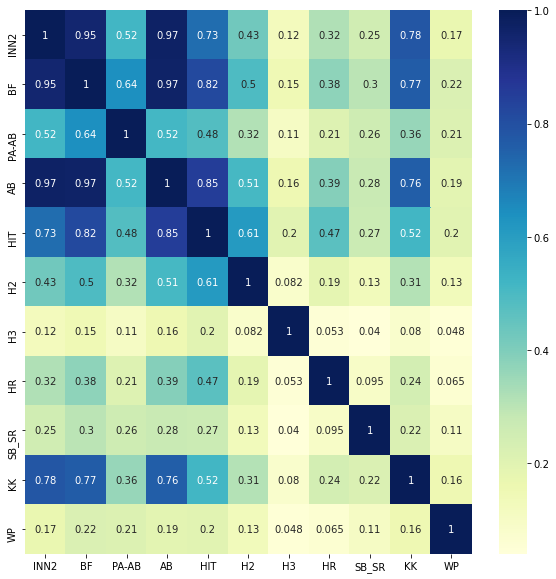

In [51]:
temp = private_pitcher.drop(['ER','ERA'],axis=1) #종속변수 drop
figure,ax1 = plt.subplots()
figure.set_size_inches(10,10)

sns.heatmap(temp.corr(),annot=True,cmap='YlGnBu')

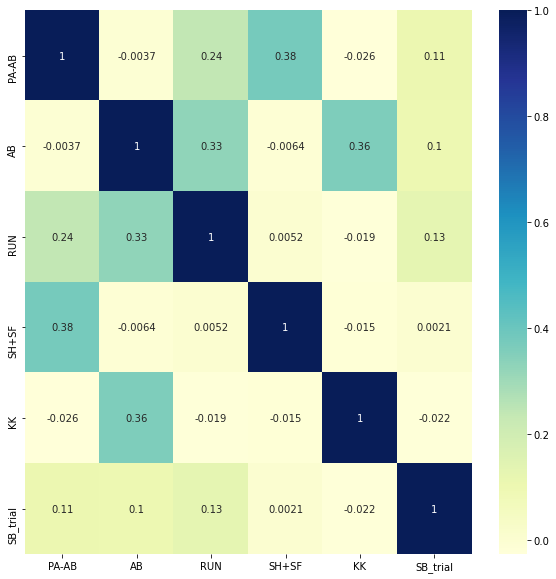

In [52]:
temp = private_batter.drop(['HIT','AVG'],axis=1) #종속변수 drop
figure,ax1 = plt.subplots()
figure.set_size_inches(10,10)

sns.heatmap(temp.corr(),annot=True,cmap='YlGnBu')

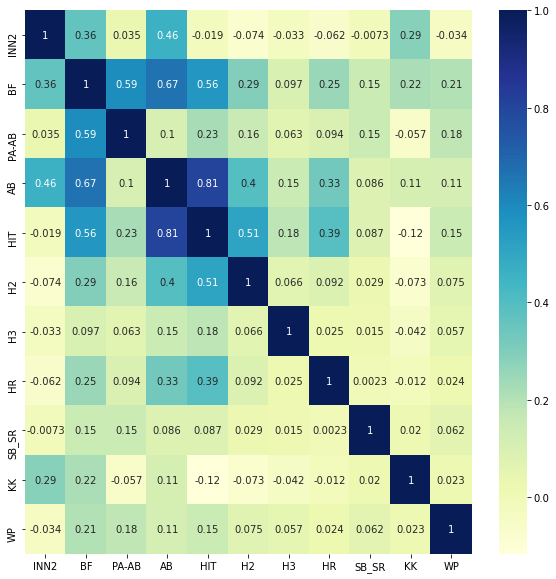

In [53]:
temp = team_pitcher.drop(['ER','ERA'],axis=1) #종속변수 drop
figure,ax1 = plt.subplots()
figure.set_size_inches(10,10)

sns.heatmap(temp.corr(),annot=True,cmap='YlGnBu')

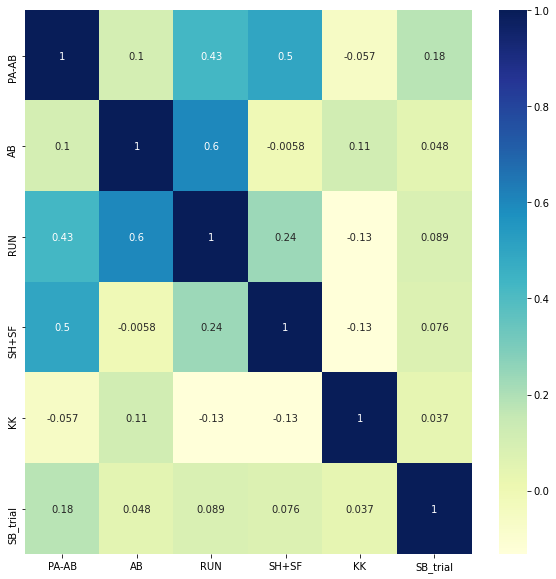

In [54]:
temp = team_batter.drop(['HIT','AVG'],axis=1) #종속변수 drop
figure,ax1 = plt.subplots()
figure.set_size_inches(10,10)

sns.heatmap(temp.corr(),annot=True,cmap='YlGnBu')